<a href="https://colab.research.google.com/github/julianovale/optimization_metaheuristics_python/blob/master/0002_simulated_annealing_combinatorial_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulated annealing combinatorial problem

Existem 8 departamentos para serem alocados em duas linhas, com 4 departamentos em cada. Essa localização determina a distância entre eles.

Além da distância, existe o fluxo entre estes departamentos. O fluxo é fixo, não pode ser modificado.

Função objetivo é a minimização do custo, que é expresso por:

cost = distance * flow

Link da matriz de distância e fluxo:

https://github.com/julianovale/optimization_metaheuristics_python/blob/master/Quadratic_Assignment_Problem_02.png

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [29]:
# criando as matrizes de distância e de fluxo
Dist = pd.DataFrame([[0,1,2,3,1,2,3,4],[1,0,1,2,2,1,2,3],[2,1,0,1,3,2,1,2],
                      [3,2,1,0,4,3,2,1],[1,2,3,4,0,1,2,3],[2,1,2,3,1,0,1,2],
                      [3,2,1,2,2,1,0,1],[4,3,2,1,3,2,1,0]],
                    columns=["A","B","C","D","E","F","G","H"],
                    index=["A","B","C","D","E","F","G","H"])
Flow = pd.DataFrame([[0,5,2,4,1,0,0,6],[5,0,3,0,2,2,2,0],[2,3,0,0,0,0,0,5],
                      [4,0,0,0,5,2,2,10],[1,2,0,5,0,10,0,0],[0,2,0,2,10,0,5,1],
                      [0,2,0,2,0,5,0,10],[6,0,5,10,0,1,10,0]],
                    columns=["A","B","C","D","E","F","G","H"],
                    index=["A","B","C","D","E","F","G","H"])

In [30]:
# hiperparâmetros (verificar arquivo 0001_simulated_annealing_continuos_problem para verificar entender)
T0 = 1500
M = 250
N = 20
alpha = 0.9

In [31]:
# solução inicial
X0 = ["B", "D", "A", "E", "C", "F", "G", "H"] # preciso registrar uma solução inicial qualquer, não precisa ser uma boa solução

In [32]:
# fazendo um DataFrame da solução inicial
New_Dist_DF = Dist.reindex(columns= X0, index= X0)
New_Dist_Arr = np.array(New_Dist_DF)

In [33]:
# calculando o custo da solução inicial
Objfun1_start = pd.DataFrame(New_Dist_Arr * Flow)
Objfun1_start_Arr = np.array(Objfun1_start)
sum_start = sum(sum(Objfun1_start_Arr)) # a soma interna soma todos os elementos por linha, a externa soma essas somas de linhas.
print("Custo da solução inicial: ", sum_start)

Custo da solução inicial:  336


In [34]:
# para a posterior plotagem, crio listas vazias
Temp = []
Min_Cost = []

In [35]:
# busco a solução
momento_inicio = datetime.now()
for i in range(M):
    for j in range(N):
        # cria-se dois números aleatórios **inteiros** para trocar a posição de 2 dos departamentos, o "len(X0)" garante que será no máximo 8 (número de deptos.)
        ran_1 = np.random.randint(0,len(X0))
        ran_2 = np.random.randint(0,len(X0))
       
        while ran_1==ran_2:
            ran_2 = np.random.randint(0,len(X0)) # se o número aleatório ran_2 = ran_1 cria outro ran_2... até que seja diferente
        
        xt = [] # cria-se para armazenar a nova solução
        
        A1 = X0[ran_1] # atribui na variável A1, o depto na posição escolhida aleatoriamente (ran_1)
        A2 = X0[ran_2] # atribui na variável A2, o depto na posição escolhida aleatoriamente (ran_2)

        # Fazendo uma nov lista de departamentos
        
        w = 0 # para navegar na posição (0 a 7) em X0 (solução inicial)
        for i in X0:
            if X0[w]==A1:
                xt = np.append(xt,A2) # se a posição w em X0 é igual a A1, troca-se por A2
            elif X0[w]==A2:
                xt = np.append(xt,A1) # se a posição w em X0 é igual a A2, troca-se por A1
            else:
                xt=np.append(xt,X0[w]) # caso contrário, mantém-se o valor da posição
            w = w+1 # atualiza-se a posição w

        # cria um dataframe com as distâncias da solução atual
        new_dis_df_init = Dist.reindex(columns=X0, index=X0)
        new_dis_init_arr = np.array(new_dis_df_init)
        
        # cria um dataframe com as distâncias da nova solução
        new_dis_df_new = Dist.reindex(columns=xt, index=xt)
        new_dis_new_arr = np.array(new_dis_df_new)
        
        # cria um dataframe com as distâncias multiplicadas pelo fluxo (solução atual)
        objfun_init = pd.DataFrame(new_dis_init_arr*Flow)
        objfun_init_arr = np.array(objfun_init)
        
        # cria um dataframe com as distâncias multiplicadas pelo fluxo (nova solução)
        objfun_new = pd.DataFrame(new_dis_new_arr*Flow)
        objfun_new_arr = np.array(objfun_new)
        
        sum_init = sum(sum(objfun_init_arr)) # calcula-se o custo da solução atual
        sum_new = sum(sum(objfun_new_arr)) # calcula-se o custo da nova solução
        
        # no caso da solução temporária ser pior, preciso verificar se vou acatá-la ou não:
        rand1 = np.random.rand()
        # a formula abaixo vai nos dizer, caso a solução temporária seja pior, se vou acatá-la ou não:
        # quanto mais próximo do final da busca (mais baixa a temperatura T0), menos provável de aceitar uma solução pior,
        # porque é mais provável que o número aleatório seja maior
        form = 1/(np.exp(sum_new-sum_init)/T0)
        
        if sum_new<=sum_init: # <= porque é uma solução de minimização
            X0=xt # troca-se já que a nova solução é melhor
        elif rand1<=form: # se a solução temporária é pior que a solução atual, será acatada mesmo sendo pior
            X0=xt # troca-se apesar de ser pior, mais quanto menor a temperatura, menos provável que isso aconteça
        else: # caso contrário, segue o jogo sem atualizar a solução
            X0=X0
        
    Temp.append(T0) # adiciona-se solução para plotagem
    Min_Cost.append(sum_init) # adiciona-se o custo da solução para plotagem
    
    T0 = alpha*T0 # atualiza-se a temperatura (vai caindo...)
    tempo_gasto = datetime.now() - momento_inicio # calcula-se o tempo de processamento


Final Solution: ['B' 'A' 'E' 'C' 'D' 'H' 'G' 'F']
Minimized Cost: 214
Tempo de processamento:  0:00:17.157439


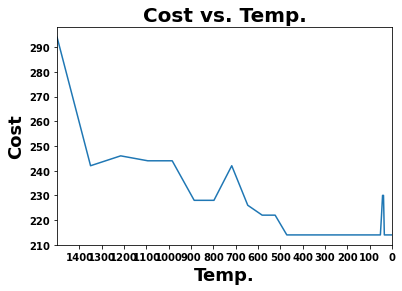

In [36]:
# plotagens
print()
print("Final Solution:",X0)
print("Minimized Cost:",sum_init)
print("Tempo de processamento: ", tempo_gasto)
        
plt.plot(Temp,Min_Cost)
plt.title("Cost vs. Temp.", fontsize=20,fontweight='bold')
plt.xlabel("Temp.", fontsize=18,fontweight='bold')
plt.ylabel("Cost", fontsize=18,fontweight='bold')
plt.xlim(1500,0)

plt.xticks(np.arange(min(Temp),max(Temp),100),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()